In [123]:
import pandas as pd
import numpy as np


In [ ]:
%cd "C:/Users/Vivek Chauhan/OneDrive/Desktop/AnalytixLabs_data_Machine"

In [125]:
data = pd.read_csv("test_passenger.csv")

In [126]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
data.shape

(418, 12)

# Data Cleaning 

In [128]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [129]:
# Missing Value treatment 

In [130]:
# Fill missing Age
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


In [131]:
# Fill missing Fare
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [132]:
# Create Deck from Cabin
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
data.drop(columns=['Cabin'], inplace=True)

In [133]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [134]:
# there is not missing values 

In [135]:
# checking duplicates

In [136]:
np.sum(data.duplicated())

0

In [137]:
# Doing the outlier treatment 

In [138]:
def out_trt(ref_column):
    if (ref_column.dtype =="float64") | (ref_column.dtype == "int64"):
        out_trt_column = np.where(ref_column >= ref_column.quantile(0.99), ref_column.quantile(0.99), 
        np.where(ref_column <= ref_column.quantile(0.01),ref_column.quantile(0.01),ref_column))
    else:
        out_trt_column = ref_column
    return out_trt_column

In [139]:
data.apply(lambda x : out_trt(x), axis = 0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,896.17,0.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,Q,U
1,896.17,1.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,S,U
2,896.17,0.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,Q,U
3,896.17,0.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,S,U
4,896.17,1.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,S,U
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1304.83,0.0,3.0,"Spector, Mr. Woolf",male,24.0,0.0,0.0,A.5. 3236,8.0500,S,U
414,1304.83,1.0,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.9000,C,C
415,1304.83,0.0,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0.0,0.0,SOTON/O.Q. 3101262,7.2500,S,U
416,1304.83,0.0,3.0,"Ware, Mr. Frederick",male,24.0,0.0,0.0,359309,8.0500,S,U


In [140]:
# Feature Engineering 

In [40]:
''' why are we going to extract the title 

The Title (Mr., Mrs., Miss., Master, etc.) can be:

A proxy for age, gender, and social status.

A categorical feature that may impact survival. For example:

Master (young boys) had a relatively high survival rate.

Mrs and Miss also had higher chances compared to Mr.


'''

' why are we going to extract the title \n\nThe Title (Mr., Mrs., Miss., Master, etc.) can be:\n\nA proxy for age, gender, and social status.\n\nA categorical feature that may impact survival. For example:\n\nMaster (young boys) had a relatively high survival rate.\n\nMrs and Miss also had higher chances compared to Mr.\n\n\n'

In [141]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
# SibSp: Number of siblings or spouses aboard the Titanic with the passenger
# Parch: Number of parents or children aboard the Titanic with the passenger
''' 
SibSp = 1 (e.g., traveling with spouse)

Parch = 2 (e.g., traveling with two children)

FamilySize = 1 + 2 + 1 = 4 (3 relatives + self)
'''

In [142]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [143]:
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

In [144]:
data.drop(columns=['Name', 'Ticket'], inplace=True)

In [145]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,IsAlone
0,892,0,3,male,34.5,0,0,7.8292,Q,U,Mr,1,1
1,893,1,3,female,47.0,1,0,7.0000,S,U,Mrs,2,0
2,894,0,2,male,62.0,0,0,9.6875,Q,U,Mr,1,1
3,895,0,3,male,27.0,0,0,8.6625,S,U,Mr,1,1
4,896,1,3,female,22.0,1,1,12.2875,S,U,Mrs,3,0


# Data Visualization

In [146]:
# Survival Rate by Gender

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt


In [148]:
# style for better plots
sns.set(style="whitegrid")


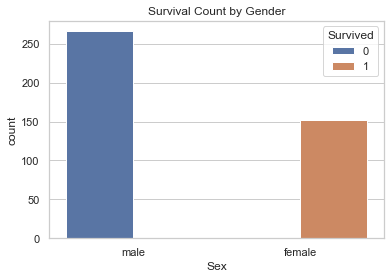

In [149]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

In [150]:
# Survival Rate by Pclass

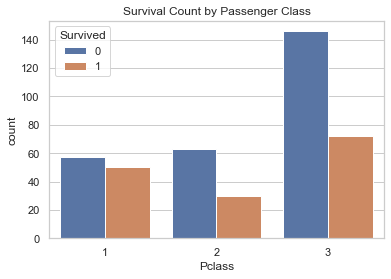

In [151]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

In [152]:
# Survival Rate by Age (Distribution Plot)

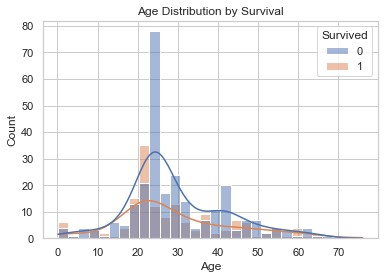

In [153]:
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

In [154]:
#Survival Rate by Embarked

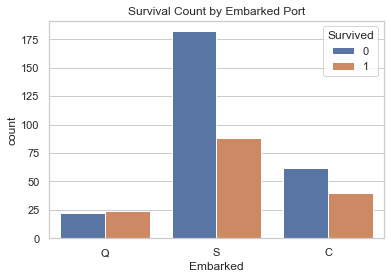

In [155]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked Port')
plt.show()

In [156]:
data.groupby('Sex')['Survived'].mean()


Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

In [157]:
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

# Data Modelling

In [98]:
#  Normalize / Scale

In [99]:
from sklearn.preprocessing import StandardScaler


In [100]:
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [101]:
# Lable Encoding 

In [113]:
from sklearn.preprocessing import LabelEncoder


In [114]:
for col in ['Sex', 'Embarked', 'Title', 'Deck']:
    data[col] = LabelEncoder().fit_transform(data[col])

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [116]:
from sklearn.metrics import classification_report, accuracy_score

In [117]:
X = data.drop(['PassengerId', 'Survived'], axis=1)
y = data['Survived']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [120]:
y_pred = model.predict(X_test)

In [121]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [122]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

